In [1]:
import os
import pickle
import numpy as np
import tensorflow as tf

from model import ParserMLP
from DPUtils import plot_history

# Check for GPU availability (Optional)
print("TensorFlow Version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2025-12-03 18:51:47.806709: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-03 18:51:47.820838: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8473] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-03 18:51:47.824967: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1471] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-03 18:51:47.836927: I tensorflow/core/platform/cpu_feature_guard.cc:211] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow Version: 2.17.0
Num GPUs Available:  1


I0000 00:00:1764787910.094044   79017 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1764787910.180379   79017 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1764787910.180416   79017 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [2]:
dataset_path = "dataset.pkl"

if not os.path.exists(dataset_path):
    print(f"Error: '{dataset_path}' not found. Please run main.py first to generate it.")
else:
    print(f"Loading dataset from {dataset_path}...")
    with open(dataset_path, "rb") as f:
        data = pickle.load(f)
        
    training_samples = data["training_samples"]
    dev_samples = data["dev_samples"]
    deprels = data["deprels"]
    actions = data["actions"]
    
    print("Dataset loaded successfully!")
    print(f"Training Samples: {len(training_samples)}")
    print(f"Development Samples: {len(dev_samples)}")
    print(f"Unique Dependency Labels: {len(deprels)}")

Loading dataset from dataset.pkl...
Dataset loaded successfully!
Training Samples: 81182
Development Samples: 4978
Unique Dependency Labels: 43


In [3]:
# Inspect the first training sample
sample = training_samples[80000]

print(f"--- Sample 1 ---")
# Note: Accessing internal state for visualization
print(f"State Stack: {[t.form for t in sample.state.S]}")
print(f"State Buffer (first 3): {[t.form for t in sample.state.B[:3]]}...")
print(f"Gold Transition: {sample.transition}")

--- Sample 1 ---
State Stack: ['ROOT', 'The']
State Buffer (first 3): ['revolution', 'in', 'the']...
Gold Transition: LEFT-ARC-det


In [4]:
# Extract features from the loaded sample
feats = sample.state_to_feats(nstack_feats=1, nbuffer_feats=1)

print("Feature List:", feats)

# Expected output format: 
# [Stack_Word_1, Stack_Word_0, Buffer_Word_0, Buffer_Word_1, 
#  Stack_UPOS_1, Stack_UPOS_0, Buffer_UPOS_0, Buffer_UPOS_1]

Feature List: ['The', 'revolution', 'DET', 'NOUN']


In [5]:
# Initialize Model
# You can adjust dimensions and epochs as needed
model = ParserMLP(word_emb_dim=200, hidden_dim=256, epochs=50, batch_size=64, learning_rate=0.0001)

print("Starting training...")
# The train function handles vocabulary building and vectorization internally
history = model.train(training_samples, dev_samples)

Starting training...
Building vocabulary...
Vocab built: 6872 words, 20 UPOS tags.
Detected Feature Shape: 4 words, 4 tags.
Vectorizing data...
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 words_input (InputLayer)    [(None, 4)]                  0         []                            
                                                                                                  
 upos_input (InputLayer)     [(None, 4)]                  0         []                            
                                                                                                  
 embedding (Embedding)       (None, 4, 200)               1374400   ['words_input[0][0]']         
                                                                                                  
 embedding_1 (Embedding)     (None, 4, 50)       

I0000 00:00:1764787911.584187   79017 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1764787911.584243   79017 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1764787911.584254   79017 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1764787911.828455   79017 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1764787911.828502   79017 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-12-03

Epoch 1/50


'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

   2/1269 [..............................] - ETA: 1:48 - loss: 4.1967 - action_output_loss: 1.3857 - deprel_output_loss: 3.7481 - action_output_accuracy: 0.2812 - deprel_output_accuracy: 0.0859 

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


   4/1269 [..............................] - ETA: 2:11 - loss: 4.1921 - action_output_loss: 1.3865 - deprel_output_loss: 3.7407 - action_output_accuracy: 0.2695 - deprel_output_accuracy: 0.1133

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


   6/1269 [..............................] - ETA: 2:17 - loss: 4.1905 - action_output_loss: 1.3861 - deprel_output_loss: 3.7393 - action_output_accuracy: 0.2656 - deprel_output_accuracy: 0.1354

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


   9/1269 [..............................] - ETA: 2:06 - loss: 4.1876 - action_output_loss: 1.3855 - deprel_output_loss: 3.7361 - action_output_accuracy: 0.2569 - deprel_output_accuracy: 0.1615

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


  13/1269 [..............................] - ETA: 1:51 - loss: 4.1839 - action_output_loss: 1.3840 - deprel_output_loss: 3.7333 - action_output_accuracy: 0.2716 - deprel_output_accuracy: 0.1899

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


  17/1269 [..............................] - ETA: 1:42 - loss: 4.1792 - action_output_loss: 1.3820 - deprel_output_loss: 3.7297 - action_output_accuracy: 0.2932 - deprel_output_accuracy: 0.2252

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


  24/1269 [..............................] - ETA: 1:26 - loss: 4.1722 - action_output_loss: 1.3807 - deprel_output_loss: 3.7220 - action_output_accuracy: 0.2988 - deprel_output_accuracy: 0.2871

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


  33/1269 [..............................] - ETA: 1:13 - loss: 4.1634 - action_output_loss: 1.3779 - deprel_output_loss: 3.7141 - action_output_accuracy: 0.3172 - deprel_output_accuracy: 0.3262

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


  41/1269 [..............................] - ETA: 1:04 - loss: 4.1551 - action_output_loss: 1.3763 - deprel_output_loss: 3.7050 - action_output_accuracy: 0.3262 - deprel_output_accuracy: 0.3601

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


  58/1269 [>.............................] - ETA: 50s - loss: 4.1333 - action_output_loss: 1.3712 - deprel_output_loss: 3.6827 - action_output_accuracy: 0.3564 - deprel_output_accuracy: 0.3963

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


  75/1269 [>.............................] - ETA: 41s - loss: 4.1037 - action_output_loss: 1.3644 - deprel_output_loss: 3.6524 - action_output_accuracy: 0.3856 - deprel_output_accuracy: 0.4179

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


  87/1269 [=>............................] - ETA: 38s - loss: 4.0794 - action_output_loss: 1.3591 - deprel_output_loss: 3.6270 - action_output_accuracy: 0.4066 - deprel_output_accuracy: 0.4289

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 110/1269 [=>............................] - ETA: 34s - loss: 4.0203 - action_output_loss: 1.3463 - deprel_output_loss: 3.5653 - action_output_accuracy: 0.4361 - deprel_output_accuracy: 0.4368

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 138/1269 [==>...........................] - ETA: 28s - loss: 3.9065 - action_output_loss: 1.3248 - deprel_output_loss: 3.4423 - action_output_accuracy: 0.4686 - deprel_output_accuracy: 0.4481

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 158/1269 [==>...........................] - ETA: 4:36 - loss: 3.8075 - action_output_loss: 1.3075 - deprel_output_loss: 3.3334 - action_output_accuracy: 0.4827 - deprel_output_accuracy: 0.4537

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

 795/1269 [=================>............] - ETA: 26s - loss: 2.2388 - action_output_loss: 0.7800 - deprel_output_loss: 1.9450 - action_output_accuracy: 0.7039 - deprel_output_accuracy: 0.5527

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 802/1269 [=================>............] - ETA: 25s - loss: 2.2313 - action_output_loss: 0.7770 - deprel_output_loss: 1.9391 - action_output_accuracy: 0.7050 - deprel_output_accuracy: 0.5537

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


1248/1269 [============================>.] - ETA: 0s - loss: 1.9096 - action_output_loss: 0.6702 - deprel_output_loss: 1.6525 - action_output_accuracy: 0.7445 - deprel_output_accuracy: 0.6029

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


1269/1269 [==============================] - 15s 10ms/step - loss: 1.8975 - action_output_loss: 0.6663 - deprel_output_loss: 1.6415 - action_output_accuracy: 0.7459 - deprel_output_accuracy: 0.6052 - val_loss: 1.1823 - val_action_output_loss: 0.4321 - val_deprel_output_loss: 1.0003 - val_action_output_accuracy: 0.8379 - val_deprel_output_accuracy: 0.7200
Epoch 2/50
 118/1269 [=>............................] - ETA: 5:56 - loss: 1.1293 - action_output_loss: 0.4173 - deprel_output_loss: 0.9493 - action_output_accuracy: 0.8427 - deprel_output_accuracy: 0.7365

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 793/1269 [=================>............] - ETA: 24s - loss: 1.0793 - action_output_loss: 0.4064 - deprel_output_loss: 0.8972 - action_output_accuracy: 0.8465 - deprel_output_accuracy: 0.7509

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


1269/1269 [==============================] - 10s 8ms/step - loss: 1.0333 - action_output_loss: 0.3969 - deprel_output_loss: 0.8486 - action_output_accuracy: 0.8500 - deprel_output_accuracy: 0.7627 - val_loss: 0.9690 - val_action_output_loss: 0.4013 - val_deprel_output_loss: 0.7570 - val_action_output_accuracy: 0.8461 - val_deprel_output_accuracy: 0.7748
Epoch 3/50
 154/1269 [==>...........................] - ETA: 4:25 - loss: 0.8628 - action_output_loss: 0.3296 - deprel_output_loss: 0.7109 - action_output_accuracy: 0.8772 - deprel_output_accuracy: 0.7992

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 852/1269 [===================>..........] - ETA: 20s - loss: 0.8233 - action_output_loss: 0.3280 - deprel_output_loss: 0.6604 - action_output_accuracy: 0.8787 - deprel_output_accuracy: 0.8088

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


1269/1269 [==============================] - 10s 8ms/step - loss: 0.8086 - action_output_loss: 0.3241 - deprel_output_loss: 0.6461 - action_output_accuracy: 0.8804 - deprel_output_accuracy: 0.8125 - val_loss: 0.8885 - val_action_output_loss: 0.3979 - val_deprel_output_loss: 0.6542 - val_action_output_accuracy: 0.8546 - val_deprel_output_accuracy: 0.8021
Epoch 4/50
 222/1269 [====>.........................] - ETA: 2:55 - loss: 0.6989 - action_output_loss: 0.2721 - deprel_output_loss: 0.5690 - action_output_accuracy: 0.9010 - deprel_output_accuracy: 0.8311

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 902/1269 [====================>.........] - ETA: 17s - loss: 0.6803 - action_output_loss: 0.2703 - deprel_output_loss: 0.5467 - action_output_accuracy: 0.9017 - deprel_output_accuracy: 0.8376

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


1269/1269 [==============================] - 10s 8ms/step - loss: 0.6781 - action_output_loss: 0.2732 - deprel_output_loss: 0.5399 - action_output_accuracy: 0.9004 - deprel_output_accuracy: 0.8378 - val_loss: 0.8642 - val_action_output_loss: 0.4062 - val_deprel_output_loss: 0.6107 - val_action_output_accuracy: 0.8546 - val_deprel_output_accuracy: 0.8136
Epoch 5/50
 282/1269 [=====>........................] - ETA: 2:11 - loss: 0.5855 - action_output_loss: 0.2321 - deprel_output_loss: 0.4713 - action_output_accuracy: 0.9183 - deprel_output_accuracy: 0.8552

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


1269/1269 [==============================] - 9s 7ms/step - loss: 0.5861 - action_output_loss: 0.2322 - deprel_output_loss: 0.4718 - action_output_accuracy: 0.9170 - deprel_output_accuracy: 0.8548 - val_loss: 0.8726 - val_action_output_loss: 0.4236 - val_deprel_output_loss: 0.5987 - val_action_output_accuracy: 0.8503 - val_deprel_output_accuracy: 0.8148
Epoch 6/50
1269/1269 [==============================] - 9s 7ms/step - loss: 0.5175 - action_output_loss: 0.2013 - deprel_output_loss: 0.4216 - action_output_accuracy: 0.9300 - deprel_output_accuracy: 0.8682 - val_loss: 0.8867 - val_action_output_loss: 0.4452 - val_deprel_output_loss: 0.5887 - val_action_output_accuracy: 0.8503 - val_deprel_output_accuracy: 0.8216


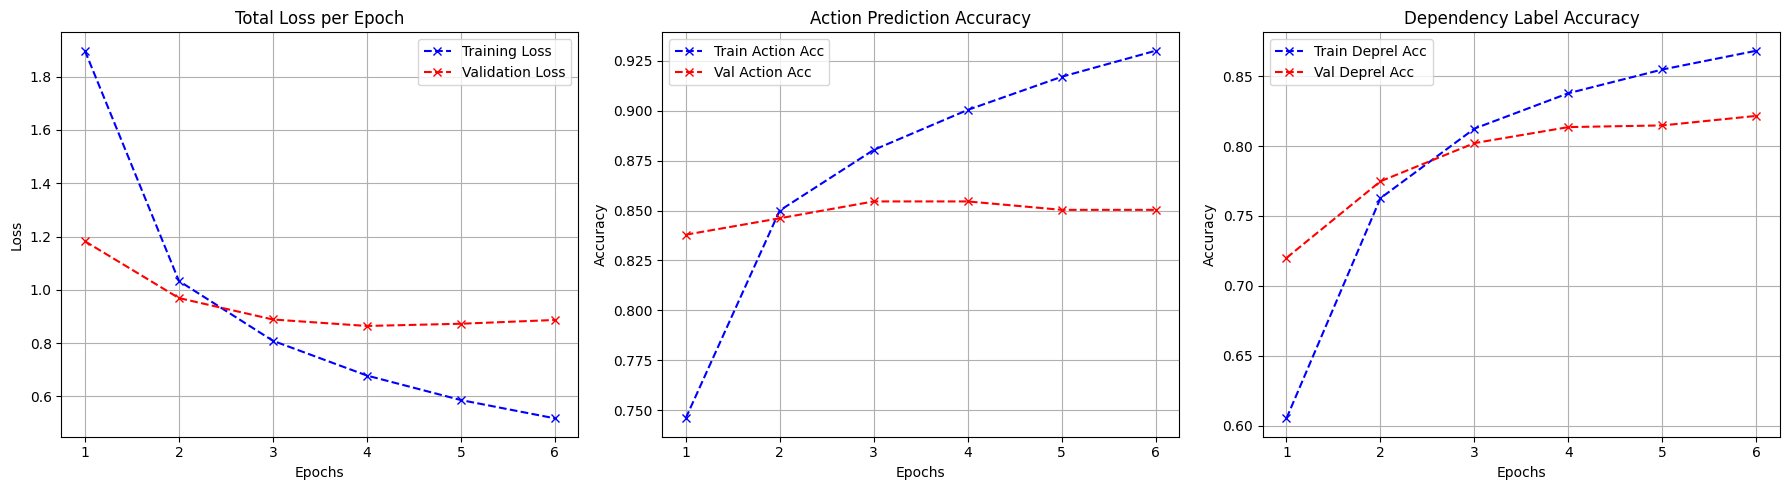

In [6]:
plot_history(history)

In [7]:
from conllu_reader import ConlluReader

# Initialize reader if not already done
reader = ConlluReader()

# Load the test set
# We use inference=True to ensure we treat this as unparsed data
print("Loading test set...")
test_trees = reader.read_conllu_file("en_partut-ud-test_clean.conllu", inference=True)
print(f"Loaded {len(test_trees)} sentences for testing.")

Loading test set...
Loaded 153 sentences for testing.


In [8]:
test_trees[1]

[0	ROOT	ROOT	ROOT_UPOS	ROOT_CPOS	ROOT_FEATS	_	_	_	_,
 1	Any	any	DET	DI	PronType=Ind	_	_	_	_,
 2	use	use	NOUN	S	Number=Sing	_	_	_	_,
 3	of	of	ADP	E	_	_	_	_	_,
 4	the	the	DET	RD	Definite=Def|PronType=Art	_	_	_	_,
 5	work	work	NOUN	S	Number=Sing	_	_	_	_,
 6	other	other	ADJ	A	Degree=Pos	_	_	_	_,
 7	than	than	SCONJ	CS	_	_	_	_	_,
 8	as	as	ADP	E	_	_	_	_	_,
 9	authorized	authorize	VERB	V	Tense=Past|VerbForm=Part	_	_	_	_,
 10	under	under	ADP	E	_	_	_	_	_,
 11	this	this	DET	DD	Number=Sing|PronType=Dem	_	_	_	_,
 12	license	license	NOUN	S	Number=Sing	_	_	_	_,
 13	or	or	CCONJ	CC	_	_	_	_	_,
 14	copyright	copyright	NOUN	S	Number=Sing	_	_	_	_,
 15	law	law	NOUN	S	Number=Sing	_	_	_	_,
 16	is	be	AUX	VA	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	_	_	_	_,
 17	prohibited	prohibit	VERB	V	Tense=Past|VerbForm=Part	_	_	_	_,
 18	.	.	PUNCT	FS	_	_	_	_	_]

In [9]:
# Conduct inference on the test set
print("Running inference on the test set...")
# The model.run method modifies the trees in-place or returns them
# It predicts the HEAD and DEPREL for each token
predicted_test_trees = model.run(test_trees)

print("Inference complete.")

Running inference on the test set...
Inference complete.


In [10]:
output_path = "output_one_feature_raw.conllu"

print(f"Saving raw predictions to {output_path}...")
reader.write_conllu_file(output_path, predicted_test_trees)
print("File saved.")

Saving raw predictions to output_one_feature_raw.conllu...
File saved.


In [11]:
from postprocessor import PostProcessor

post = PostProcessor()

print(f"Post-processing predictions in {output_path}...")

fixed_trees = post.postprocess(output_path)

final_output_path = "output_one_feature_fixed.conllu"
reader.write_conllu_file(final_output_path, fixed_trees)

print(f"Post-processing complete. Final predictions saved to {final_output_path}")

Post-processing predictions in output_one_feature_raw.conllu...
Post-processing complete. Final predictions saved to output_one_feature_fixed.conllu


In [12]:
# Run the evaluation script comparing the Gold Standard (test_clean) against your Fixed Output
# -v provides verbose output
!python conll18_ud_eval.py en_partut-ud-test_clean.conllu output_one_feature_fixed.conllu -v

Metric     | Precision |    Recall |  F1 Score | AligndAcc
-----------+-----------+-----------+-----------+-----------
Tokens     |    100.00 |    100.00 |    100.00 |
Sentences  |    100.00 |    100.00 |    100.00 |
Words      |    100.00 |    100.00 |    100.00 |
UPOS       |    100.00 |    100.00 |    100.00 |    100.00
XPOS       |    100.00 |    100.00 |    100.00 |    100.00
UFeats     |    100.00 |    100.00 |    100.00 |    100.00
AllTags    |    100.00 |    100.00 |    100.00 |    100.00
Lemmas     |    100.00 |    100.00 |    100.00 |    100.00
UAS        |     74.88 |     74.88 |     74.88 |     74.88
LAS        |     62.94 |     62.94 |     62.94 |     62.94
CLAS       |     46.70 |     46.49 |     46.60 |     46.49
MLAS       |     45.23 |     45.03 |     45.13 |     45.03
BLEX       |     46.70 |     46.49 |     46.60 |     46.49
